In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

0   airplane
1   automobile
2   bird
3   cat
4   deer
5   dog
6   frog
7   horse
8   ship
9   truck

[1]


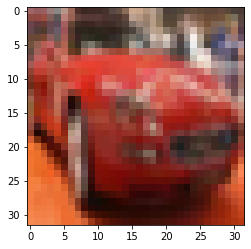

In [ ]:
plt.imshow(x_train[5],cmap="gray")
print(y_train[5])

In [ ]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [ ]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'tanh'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = (32,32,3)))
model.add(keras.layers.AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'same'))

model.add(Conv2D(filters=16,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'tanh'))
model.add(keras.layers.AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=120,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'tanh'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(84,activation = 'tanh'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 8, 8, 16)         0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 8, 8, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 120)         4

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/20
391/391 [==============================] - 15s 14ms/step - loss: 1.8409 - accuracy: 0.3478 - val_loss: 1.6954 - val_accuracy: 0.4034
Epoch 2/20
391/391 [==============================] - 5s 13ms/step - loss: 1.6636 - accuracy: 0.4137 - val_loss: 1.5503 - val_accuracy: 0.4482
Epoch 3/20
391/391 [==============================] - 5s 13ms/step - loss: 1.5548 - accuracy: 0.4499 - val_loss: 1.4751 - val_accuracy: 0.4797
Epoch 4/20
391/391 [==============================] - 5s 13ms/step - loss: 1.5051 - accuracy: 0.4710 - val_loss: 1.4514 - val_accuracy: 0.4856
Epoch 5/20
391/391 [==============================] - 5s 13ms/step - loss: 1.4785 - accuracy: 0.4770 - val_loss: 1.4368 - val_accuracy: 0.4917
Epoch 6/20
391/391 [==============================] - 5s 13ms/step - loss: 1.4594 - accuracy: 0.4828 - val_loss: 1.4087 - val_accuracy: 0.5014
Epoch 7/20
391/391 [==============================] - 5s 13ms/step - loss: 1.4417 - accuracy: 0.4892 - val_loss: 1.4295 - val_accuracy: 0.493

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.4035 - accuracy: 0.5010


313/313 [==============================] - 1s 4ms/step - loss: 1.4035 - accuracy: 0.5010


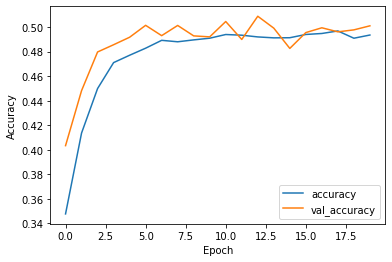

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4035 - accuracy: 0.5010


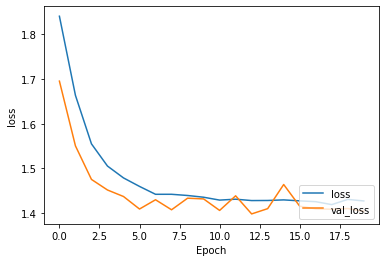

In [ ]:
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test)